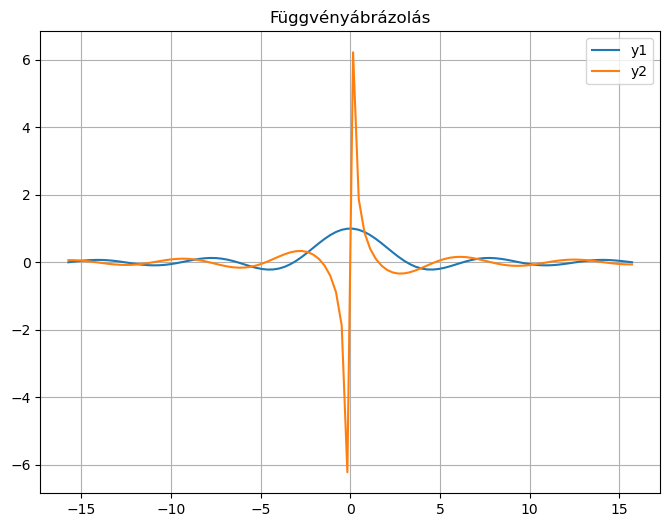

In [20]:
#1. Függvényábrázolás

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

x = np.linspace(-5 * np.pi, 5 * np.pi, 100)
y1 = np.sin(x) / x
y2 = np.cos(x) / x

plt.figure(figsize=(8, 6))

plt.plot(x, y1, label='y1')  
plt.plot(x, y2, label='y2')  


plt.grid(True)
plt.legend()
plt.title("Függvényábrázolás")

plt.show()

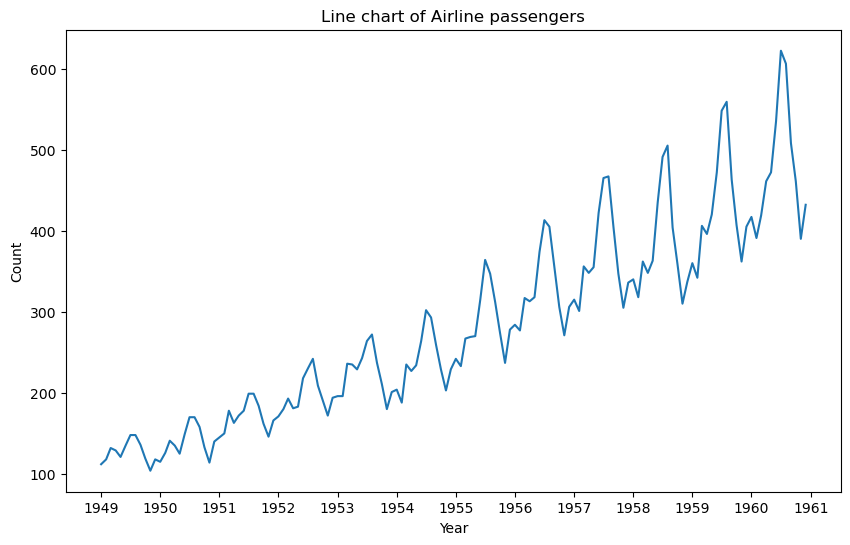

In [24]:
#Idősor ábrázolás

import pandas as pd


df = pd.read_csv('airline-passengers.csv', parse_dates=['Month'], index_col='Month')

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'])

plt.title("Line chart of Airline passengers")
plt.xlabel("Year")
plt.ylabel("Count")

ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.show()



In [28]:
#Dataframe feladatok
#1

df2=pd.read_excel('Ertekesites(nagyker).xlsx', sheet_name ='Lekérdezés1')

df2

,Dátum,Kategórianév,Terméknév,Mennyiség,Bevétel,Költség,Nyereség,Vevőnév,Vevő megye,Vevő város,Bolt megye,Bolt város,Boltnév
0,2015-01-02,Iroda,Toll,800,320000,256000.0,64000.0,Kovács Bt,Pest,Gödöllő,Heves,Eger,2. ABC
1,2015-01-05,Iroda,Toll,800,320000,204800.0,115200.0,Kovács Bt,Pest,Gödöllő,Heves,Eger,2. ABC
2,2015-01-13,Játék,Labda,600,300000,240000.0,60000.0,Kovács Bt,Pest,Gödöllő,Heves,Gyöngyös,1. ABC
3,2015-01-16,Játék,Labda,600,300000,192000.0,108000.0,Kovács Bt,Pest,Gödöllő,Heves,Gyöngyös,1. ABC
4,2015-01-23,Játék,Labda,300,150000,120000.0,30000.0,Nagy Kft,Heves,Gyöngyös,Heves,Gyöngyös,1. ABC
...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2016-12-17,Kert,Kapa,1000,800000,640000.0,160000.0,Kovács Bt,Pest,Gödöllő,Heves,Gyöngyös,1. ABC
302,2016-12-17,Kert,Kapa,1000,800000,640000.0,160000.0,Kis Bt,Heves,Hatvan,Heves,Gyöngyös,1. ABC
303,2016-12-19,Játék,Labda,900,450000,360000.0,90000.0,Kovács Bt,Pest,Gödöllő,Heves,Eger,1. ABC
304,2016-12-20,Iroda,Ceruza,1500,450000,360000.0,90000.0,Kis Bt,Heves,Hatvan,Heves,Gyöngyös,1. ABC


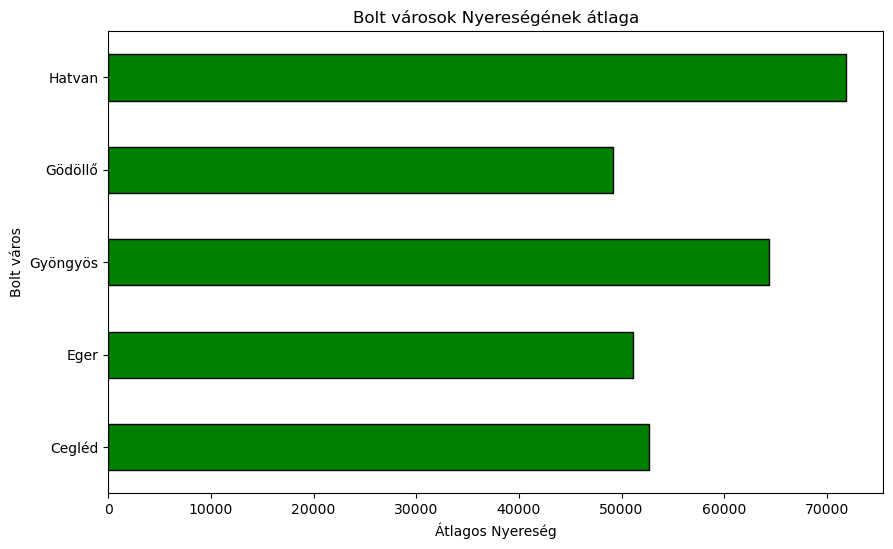

In [35]:
#2

df_atlag = df2.groupby('Bolt város')['Nyereség'].mean()

df_atlag

plt.figure(figsize=(10, 6))

df_atlag.plot(kind='barh', color='green', edgecolor='black')

plt.title('Bolt városok Nyereségének átlaga')
plt.ylabel('Bolt város')
plt.xlabel('Átlagos Nyereség')

plt.show()

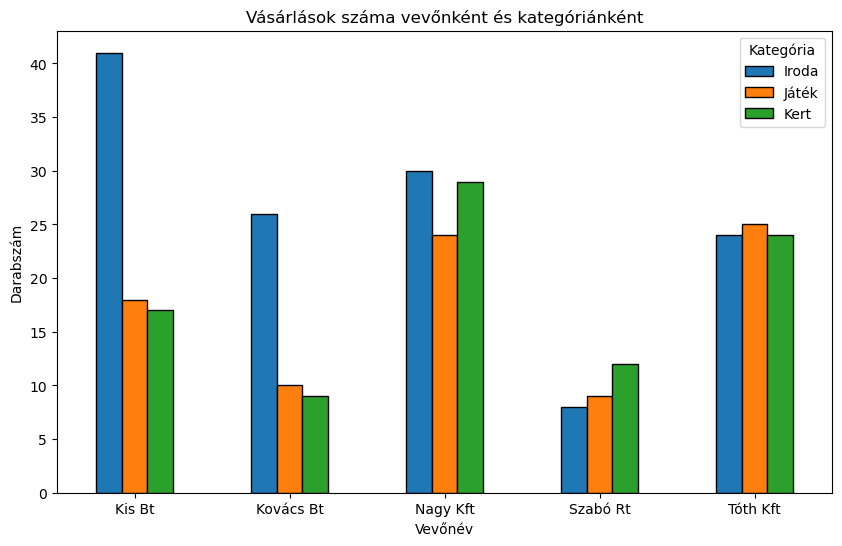

In [43]:
#3

df_pivot = df2.pivot_table(index='Vevőnév', 
                          columns='Kategórianév', 
                          aggfunc='size', 
                          fill_value=0)


df_pivot.plot(kind='bar', figsize=(10, 6), edgecolor='black')

plt.title('Vásárlások száma vevőnként és kategóriánként')
plt.ylabel('Darabszám')
plt.xlabel('Vevőnév')
plt.xticks(rotation=0)
plt.legend(title='Kategória')


plt.show()


In [48]:
#4

import datetime as dt

df2['Dátum'] = pd.to_datetime(df2['Dátum'])

legfrissebb_vasarlas = df2['Dátum'].max()

legfrissebb_vasarlas

df2['Eltelt_napok'] = (legfrissebb_vasarlas - df2['Dátum']).dt.days

df2


,Dátum,Kategórianév,Terméknév,Mennyiség,Bevétel,Költség,Nyereség,Vevőnév,Vevő megye,Vevő város,Bolt megye,Bolt város,Boltnév,Eltelt_napok
0,2015-01-02,Iroda,Toll,800,320000,256000.0,64000.0,Kovács Bt,Pest,Gödöllő,Heves,Eger,2. ABC,726
1,2015-01-05,Iroda,Toll,800,320000,204800.0,115200.0,Kovács Bt,Pest,Gödöllő,Heves,Eger,2. ABC,723
2,2015-01-13,Játék,Labda,600,300000,240000.0,60000.0,Kovács Bt,Pest,Gödöllő,Heves,Gyöngyös,1. ABC,715
3,2015-01-16,Játék,Labda,600,300000,192000.0,108000.0,Kovács Bt,Pest,Gödöllő,Heves,Gyöngyös,1. ABC,712
4,2015-01-23,Játék,Labda,300,150000,120000.0,30000.0,Nagy Kft,Heves,Gyöngyös,Heves,Gyöngyös,1. ABC,705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
301,2016-12-17,Kert,Kapa,1000,800000,640000.0,160000.0,Kovács Bt,Pest,Gödöllő,Heves,Gyöngyös,1. ABC,11
302,2016-12-17,Kert,Kapa,1000,800000,640000.0,160000.0,Kis Bt,Heves,Hatvan,Heves,Gyöngyös,1. ABC,11
303,2016-12-19,Játék,Labda,900,450000,360000.0,90000.0,Kovács Bt,Pest,Gödöllő,Heves,Eger,1. ABC,9
304,2016-12-20,Iroda,Ceruza,1500,450000,360000.0,90000.0,Kis Bt,Heves,Hatvan,Heves,Gyöngyös,1. ABC,8


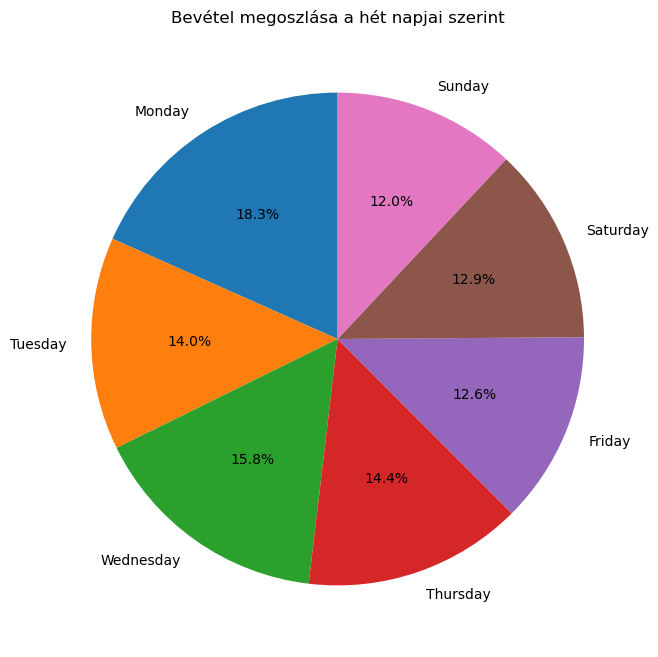

In [57]:
#5

df2['Nap'] = df2['Dátum'].dt.day_name()

napi_bevetel = df2.groupby('Nap')['Bevétel'].sum()
sorrend = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
napi_bevetel = napi_bevetel.reindex(sorrend)


plt.figure(figsize=(8, 8))

plt.pie(napi_bevetel, 
        labels=napi_bevetel.index, 
        autopct='%1.1f%%',         
        startangle=90)

plt.title('Bevétel megoszlása a hét napjai szerint')
plt.show()


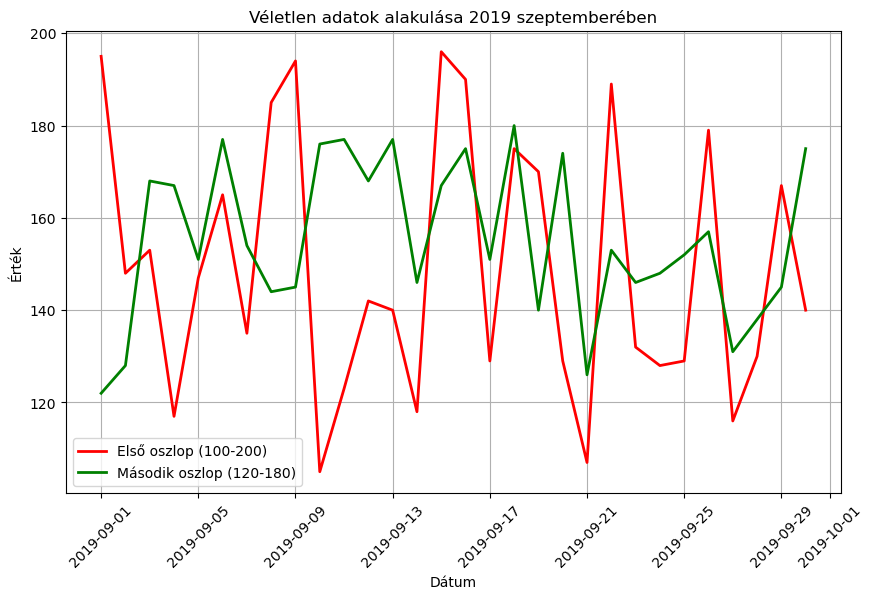

In [63]:
#6

szeptember = pd.date_range(start='2019-09-01', periods=30, freq='D')

oszlop1 = np.random.randint(low=100, high=201, size=30)
oszlop2 = np.random.randint(low=120, high=181, size=30)

df_random = pd.DataFrame({'Első oszlop' : oszlop1, 'Második oszlop' : oszlop2}, index=szeptember)

df_random


plt.figure(figsize=(10, 6))

plt.plot(df_random.index, df_random['Első oszlop'], color='red', label='Első oszlop (100-200)', linewidth=2)
plt.plot(df_random.index, df_random['Második oszlop'], color='green', label='Második oszlop (120-180)', linewidth=2)


plt.title('Véletlen adatok alakulása 2019 szeptemberében')
plt.xlabel('Dátum')
plt.ylabel('Érték')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)

plt.show()

In [ ]:
#Done